# Proyek Analisis Data: Bike Sharing Data
- **Nama:** Malika Putri Rahmawati
- **Email:** m318b4kx2392@bangkit.academy
- **ID Dicoding:** Malika Putri Rahmawati M318B4KX2392

## Menentukan Pertanyaan Bisnis

1. Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?
2. Bagaimana musim memengaruhi tingkat penggunaan sepeda?
3. Bagaimana korelasi antara suhu terhadap total order bike riding?



## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor library yang diperlukan untuk analisis data dan visualisasi
import numpy as np  # Mengimpor library numpy untuk operasi numerik (array, matriks, dll.)
import pandas as pd  # Mengimpor library pandas untuk manipulasi dan analisis data berbasis tabel (DataFrame)
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk membuat visualisasi data (plot, grafik)
import seaborn as sns  # Mengimpor seaborn untuk membuat visualisasi yang lebih interaktif dan menarik

## Data Wrangling

### Gathering Data
(tahap mengumpulkan data : day.csv dan hour.csv)

In [2]:
days_df = pd.read_csv("/content/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca dataset 'hour.csv' dan menyimpannya ke dalam DataFrame bernama 'hours_df'
hours_df = pd.read_csv("/content/hour.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk memeriksa struktur dan isi data
hours_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **pada tabel days** = berisi informasi berdasarkan hari dengan kode singkat dan normal, yaitu instant,	dteday,	season,	yr,	mnth,	hr,	holiday,	weekday,	workingday,	weathersit,	temp,	atemp,	hum,	windspeed,
casual,	registered,	cnt yang berasal dari data */content/day.csv*
- **pada tabel hours** = berisi informasi berdasarkan jam dengan kode singkat dan normal, yaitu instant,	dteday,	season,	yr,	mnth,	hr,	holiday,	weekday,	workingday,	weathersit,	temp,	atemp,	hum,	windspeed,
casual,	registered,	cnt yang berasal dari data */content/hour.csv*

### Assessing Data
(tahap menilai data)

In [4]:
# Mengonversi kolom 'dteday' menjadi tipe data datetime agar dapat diproses sebagai data waktu
days_df['dteday'] = pd.to_datetime(days_df['dteday'])

# Mengubah kolom 'season' menjadi tipe data kategori untuk menghemat memori dan mempermudah analisis
days_df['season'] = days_df.season.astype('category')

# Mengubah kolom 'mnth' (bulan) menjadi tipe data kategori karena nilai bulan merupakan data diskrit
days_df['mnth'] = days_df.mnth.astype('category')

# Mengubah kolom 'holiday' menjadi tipe data kategori karena hanya berisi nilai diskrit (hari libur atau bukan)
days_df['holiday'] = days_df.holiday.astype('category')

# Mengubah kolom 'weekday' menjadi tipe data kategori karena hanya berisi nama hari dalam seminggu (diskrit)
days_df['weekday'] = days_df.weekday.astype('category')

# Mengubah kolom 'workingday' menjadi tipe data kategori karena hanya berisi status hari kerja atau bukan (diskrit)
days_df['workingday'] = days_df.workingday.astype('category')

# Mengubah kolom 'weathersit' menjadi tipe data kategori karena hanya berisi kondisi cuaca dalam kategori tertentu
days_df['weathersit'] = days_df.weathersit.astype('category')


In [5]:
# Menampilkan ringkasan informasi tentang DataFrame, termasuk jumlah entri, tipe data, dan nilai non-null
days_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [6]:
# Menghitung jumlah nilai yang hilang (missing values) di setiap kolom pada DataFrame
days_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Menghitung jumlah baris yang duplikat dalam DataFrame
# days_df.duplicated() menghasilkan True untuk baris yang duplikat, kemudian .sum() menjumlahkannya
print("Jumlah baris duplikat:", days_df.duplicated().sum())


Jumlah baris duplikat: 0


In [8]:
# Menampilkan statistik deskriptif dari kolom-kolom numerik pada DataFrame
days_df.describe()


,instant,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [9]:
# Mengonversi kolom 'dteday' menjadi tipe data datetime agar dapat diproses sebagai data waktu
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

# Mengubah kolom 'season' menjadi tipe data kategori untuk menghemat memori dan mempermudah analisis
hours_df['season'] = hours_df.season.astype('category')

# Mengubah kolom 'mnth' (bulan) menjadi tipe data kategori karena nilai bulan merupakan data diskrit
hours_df['mnth'] = hours_df.mnth.astype('category')

# Mengubah kolom 'holiday' menjadi tipe data kategori karena hanya berisi nilai diskrit (hari libur atau bukan)
hours_df['holiday'] = hours_df.holiday.astype('category')

# Mengubah kolom 'weekday' menjadi tipe data kategori karena hanya berisi nama hari dalam seminggu (diskrit)
hours_df['weekday'] = hours_df.weekday.astype('category')

# Mengubah kolom 'workingday' menjadi tipe data kategori karena hanya berisi status hari kerja atau bukan (diskrit)
hours_df['workingday'] = hours_df.workingday.astype('category')

# Mengubah kolom 'weathersit' menjadi tipe data kategori karena hanya berisi kondisi cuaca dalam kategori tertentu
hours_df['weathersit'] = hours_df.weathersit.astype('category')


In [10]:
# Menampilkan ringkasan informasi tentang DataFrame, termasuk jumlah entri, tipe data, dan nilai non-null
hours_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [11]:
# Menghitung jumlah nilai yang hilang (missing values) di setiap kolom pada DataFrame
hours_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
# Menghitung jumlah baris yang duplikat dalam DataFrame
# hours_df.duplicated() menghasilkan True untuk baris yang duplikat, kemudian .sum() menjumlahkannya
print("Jumlah baris duplikat:", hours_df.duplicated().sum())


Jumlah baris duplikat: 0


In [13]:
# Menampilkan statistik deskriptif dari kolom-kolom numerik pada DataFrame
hours_df.describe()


,instant,dteday,yr,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**

- Kolom dteday diubah menjadi tipe data datetime untuk analisis waktu.
- Kolom season, mnth, holiday, weekday, workingday, dan weathersit diubah menjadi tipe kategori, yaitu category, datetime, float, int
- Tidak terdapat nilai kosong atau baris duplikat dalam DataFrame.
- Statistik deskriptif memberikan gambaran distribusi nilai numerik.

### Cleaning Data
(tahap membersihkan dan memperbaiki data))

In [14]:
# Mengonversi kolom 'dteday' menjadi tipe data datetime agar dapat diproses sebagai data waktu
days_df['dteday'] = pd.to_datetime(days_df['dteday'])

# Mengubah kolom 'season' menjadi tipe data kategori untuk menghemat memori dan mempermudah analisis
days_df['season'] = days_df.season.astype('category')

# Mengubah kolom 'mnth' (bulan) menjadi tipe data kategori karena nilai bulan merupakan data diskrit
days_df['mnth'] = days_df.mnth.astype('category')

# Mengubah kolom 'holiday' menjadi tipe data kategori karena hanya berisi nilai diskrit (hari libur atau bukan)
days_df['holiday'] = days_df.holiday.astype('category')

# Mengubah kolom 'weekday' menjadi tipe data kategori karena hanya berisi nama hari dalam seminggu (diskrit)
days_df['weekday'] = days_df.weekday.astype('category')

# Mengubah kolom 'workingday' menjadi tipe data kategori karena hanya berisi status hari kerja atau bukan (diskrit)
days_df['workingday'] = days_df.workingday.astype('category')

# Mengubah kolom 'weathersit' menjadi tipe data kategori karena hanya berisi kondisi cuaca dalam kategori tertentu
days_df['weathersit'] = days_df.weathersit.astype('category')


In [15]:
# Menampilkan ringkasan informasi tentang DataFrame 'days_df', termasuk jumlah entri, tipe data, dan nilai non-null
days_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [16]:
# Mengubah nama kolom pada DataFrame 'days_df' agar lebih jelas dan mudah dipahami
days_df.rename(columns={
    'dteday': 'date',            # Mengubah nama kolom 'dteday' menjadi 'date'
    'yr': 'year',                # Mengubah nama kolom 'yr' menjadi 'year'
    'mnth': 'month',             # Mengubah nama kolom 'mnth' menjadi 'month'
    'weathersit': 'weather',     # Mengubah nama kolom 'weathersit' menjadi 'weather'
    'hum': 'humidity',           # Mengubah nama kolom 'hum' menjadi 'humidity'
    'cnt': 'total_count'         # Mengubah nama kolom 'cnt' menjadi 'total_count'
}, inplace=True)


In [17]:
# Menampilkan 5 baris pertama dari DataFrame 'days_df' untuk memberikan gambaran awal tentang data
days_df.head()


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Mengonversi data pada kolom kategori variabel berdasarkan kriteria
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
days_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
days_df.year.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
days_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'holiday' : 0:nothing, 1:avaible
days_df.holiday.replace((0,1), ('doesnt exist','avaible'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
days_df.weather.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
days_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
days_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

<ipython-input-18-5b52b8885d53>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  days_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
<ipython-input-18-5b52b8885d53>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  days_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'),

In [19]:
# Menghapus kolom 'instant' dari DataFrame 'days_df' karena dianggap tidak digunakan dalam analisis
days_df = days_df.drop("instant", axis=1)

# Menampilkan 5 baris pertama dari DataFrame 'days_df' setelah kolom dihapus untuk memeriksa perubahan
days_df.head()


,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,doesnt exist,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,doesnt exist,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,doesnt exist,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,doesnt exist,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,doesnt exist,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
# Mengonversi kolom 'dteday' pada DataFrame 'hours_df' menjadi tipe data datetime untuk analisis waktu
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

# Mengubah kolom 'season' menjadi tipe data kategori untuk menghemat memori dan mempermudah analisis
hours_df['season'] = hours_df.season.astype('category')

# Mengubah kolom 'mnth' (bulan) menjadi tipe data kategori karena nilai bulan merupakan data diskrit
hours_df['mnth'] = hours_df.mnth.astype('category')

# Mengubah kolom 'holiday' menjadi tipe data kategori karena hanya berisi nilai diskrit (hari libur atau bukan)
hours_df['holiday'] = hours_df.holiday.astype('category')

# Mengubah kolom 'weekday' menjadi tipe data kategori karena hanya berisi nama hari dalam seminggu (diskrit)
hours_df['weekday'] = hours_df.weekday.astype('category')

# Mengubah kolom 'workingday' menjadi tipe data kategori karena hanya berisi status hari kerja atau bukan (diskrit)
hours_df['workingday'] = hours_df.workingday.astype('category')

# Mengubah kolom 'weathersit' menjadi tipe data kategori karena hanya berisi kondisi cuaca dalam kategori tertentu
hours_df['weathersit'] = hours_df.weathersit.astype('category')


In [21]:
# Menampilkan ringkasan informasi tentang DataFrame 'hours_df', termasuk jumlah entri, tipe data, dan nilai non-null
hours_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
# Mengubah nama kolom pada DataFrame 'hours_df' agar lebih jelas dan mudah dipahami
hours_df.rename(columns={
    'serial_number': 'instant',    # Mengubah nama kolom 'serial_number' menjadi 'instant'
    'dteday': 'date',               # Mengubah nama kolom 'dteday' menjadi 'date'
    'yr': 'year',                   # Mengubah nama kolom 'yr' menjadi 'year'
    'mnth': 'month',                # Mengubah nama kolom 'mnth' menjadi 'month'
    'hr': 'hour',                   # Mengubah nama kolom 'hr' menjadi 'hour'
    'weathersit': 'weather',        # Mengubah nama kolom 'weathersit' menjadi 'weather'
    'hum': 'humidity',              # Mengubah nama kolom 'hum' menjadi 'humidity'
    'cnt': 'count'                  # Mengubah nama kolom 'cnt' menjadi 'count'
}, inplace=True)


In [23]:
# Menampilkan 5 baris pertama dari DataFrame 'hours_df' untuk memberikan gambaran awal tentang data
hours_df.head()


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
# Mengonversi data pada kolom kategori variabel berdasarkan kriteria
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
hours_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
hours_df.year.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hours_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'holiday' : 0:nothing, 1:avaible
hours_df.holiday.replace((0,1), ('doesnt exist','avaible'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hours_df.weather.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hours_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
hours_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

<ipython-input-24-1faaaac20b51>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
<ipython-input-24-1faaaac20b51>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hours_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'

In [25]:
# Menghapus kolom 'instant' dari DataFrame 'hours_df' karena dianggap tidak digunakan dalam analisis
hours_df = hours_df.drop("instant", axis=1)

# Menampilkan 5 baris pertama dari DataFrame 'hours_df' setelah kolom dihapus untuk memeriksa perubahan
hours_df.head()


,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,Jan,0,doesnt exist,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,doesnt exist,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,doesnt exist,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,doesnt exist,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,doesnt exist,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kolom dteday pada days_df dan hours_df diubah menjadi tipe data datetime untuk pemrosesan waktu yang efisien.
- Kolom season, mnth, holiday, weekday, workingday, dan weathersit diubah menjadi tipe kategori untuk menghemat memori dan mempermudah analisis.
- Nama kolom diperbarui agar lebih jelas, misalnya dteday menjadi date, mnth menjadi month, dan lainnya.
- Nilai dalam kolom dikonversi untuk meningkatkan pemahaman, seperti mengganti kode dengan istilah yang lebih informatif.
- Kolom instant dihapus dari days_df dan hours_df karena dianggap tidak relevan untuk analisis.

## Exploratory Data Analysis (EDA)

### Explore /content/day.csv and /content/hour.csv

In [26]:
# mendefinisikan fungsi yang akan digunakan untuk EDA
def range(series):
    return series.max() - series.min()

In [27]:
# Menampilkan statistik deskriptif dari seluruh kolom pada DataFrame days_df
# Fungsi ini mencakup informasi seperti count, unique, top, freq untuk data kategorikal,
# serta statistik numerik seperti mean, std, min, 25%, 50%, 75%, dan max untuk data numerik.
days_df.describe(include="all")


,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,NaN,Jan,doesnt exist,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [28]:
# Menghitung dan menampilkan jumlah nilai unik untuk setiap kolom dalam DataFrame days_df
# Proses ini membantu untuk memahami variasi dan karakteristik dari setiap kolom.
for col in days_df.columns:
    print(f"The column '{col}' has: ", end='')
    print(len(days_df[col].unique()), 'unique values\n')


The column 'date' has: 731 unique values

The column 'season' has: 4 unique values

The column 'year' has: 2 unique values

The column 'month' has: 12 unique values

The column 'holiday' has: 2 unique values

The column 'weekday' has: 7 unique values

The column 'workingday' has: 2 unique values

The column 'weather' has: 3 unique values

The column 'temp' has: 499 unique values

The column 'atemp' has: 690 unique values

The column 'humidity' has: 595 unique values

The column 'windspeed' has: 650 unique values

The column 'casual' has: 606 unique values

The column 'registered' has: 679 unique values

The column 'total_count' has: 696 unique values



In [29]:
# Mengelompokkan penggunaan sepeda berdasarkan musim dalam DataFrame days_df
# Menggunakan agregasi untuk menghitung nilai maksimum, minimum, total, dan rata-rata dari total_count
days_df.groupby(by='season').agg({'total_count': ['max', 'min', 'sum', 'mean']})


<ipython-input-29-95aad06ef5c9>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='season').agg({'total_count': ['max', 'min', 'sum', 'mean']})


total_count                            
               max   min      sum         mean
season                                        
Winter        7836   431   471348  2604.132597
Spring        8362   795   918589  4992.331522
Summer        8714  1115  1061129  5644.303191
Fall          8555    22   841613  4728.162921

In [30]:
# Mengelompokkan penggunaan sepeda berdasarkan kondisi cuaca dalam DataFrame days_df
# Menggunakan agregasi untuk menghitung nilai maksimum, minimum, total, dan rata-rata dari total_count
days_df.groupby(['weather']).agg({'total_count': ['max', 'min', 'sum', 'mean']})


<ipython-input-30-97f2404a2912>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(['weather']).agg({'total_count': ['max', 'min', 'sum', 'mean']})


total_count                           
                       max  min      sum         mean
weather                                              
Clear                 8714  431  2257952  4876.786177
Misty                 8362  605   996858  4035.862348
Light_RainSnow        4639   22    37869  1803.285714

In [31]:
# Mengelompokkan penggunaan sepeda berdasarkan hari dalam DataFrame days_df
# Menggunakan agregasi untuk menghitung nilai maksimum, minimum, total, dan rata-rata dari total_count
days_df.groupby(by='weekday').agg({'total_count': ['max', 'min', 'sum', 'mean']})


<ipython-input-31-8a8e412567f7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='weekday').agg({'total_count': ['max', 'min', 'sum', 'mean']})


total_count                           
                  max   min     sum         mean
weekday                                         
Sunday           8227   605  444027  4228.828571
Monday           7525    22  455503  4338.123810
Tuesday          7767   683  469109  4510.663462
Wednesday        8173   441  473048  4548.538462
Thursday         7804   431  485395  4667.259615
Friday           8362  1167  487790  4690.288462
Saturday         8714   627  477807  4550.542857

In [32]:
#Mengelompokkan penggunaan Sepeda berdasarkan Berlangganan atau Tidak Berlangganan pada Tabel days_df
days_df.groupby(['registered', 'casual']).agg({'total_count': ['max', 'min', 'sum', 'mean']})

total_count                    
                          max   min   sum    mean
registered casual                                
20         2               22    22    22    22.0
416        15             431   431   431   431.0
432        9              441   441   441   441.0
451        303            754   754   754   754.0
472        34             506   506   506   506.0
...                       ...   ...   ...     ...
6844       728           7572  7572  7572  7572.0
6898       795           7693  7693  7693  7693.0
6911       780           7691  7691  7691  7691.0
6917       1250          8167  8167  8167  8167.0
6946       787           7733  7733  7733  7733.0

[731 rows x 4 columns]

In [33]:
# Menampilkan ringkasan statistik dari DataFrame hours_df
# include="all" memungkinkan menampilkan statistik untuk semua tipe data, termasuk numerik dan kategorikal
hours_df.describe(include="all")


,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,NaN,May,NaN,doesnt exist,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
# Menghitung dan menampilkan jumlah nilai unik untuk setiap kolom dalam DataFrame hours_df
for col in hours_df.columns:
    print(f"the columns {col} has: ", end='')
    print(len(hours_df[col].unique()), 'unique values\n')


the columns date has: 731 unique values

the columns season has: 4 unique values

the columns year has: 2 unique values

the columns month has: 12 unique values

the columns hour has: 24 unique values

the columns holiday has: 2 unique values

the columns weekday has: 7 unique values

the columns workingday has: 2 unique values

the columns weather has: 4 unique values

the columns temp has: 50 unique values

the columns atemp has: 65 unique values

the columns humidity has: 89 unique values

the columns windspeed has: 30 unique values

the columns casual has: 322 unique values

the columns registered has: 776 unique values

the columns count has: 869 unique values



In [35]:
# Mengelompokkan penggunaan sepeda berdasarkan musim dalam DataFrame hours_df
hours_df.groupby(by='season').agg({'count': ['max', 'min', 'sum', 'mean']})


<ipython-input-35-3baffca1dc7d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by='season').agg({'count': ['max', 'min', 'sum', 'mean']})


count                         
         max min      sum        mean
season                               
Winter   801   1   471348  111.114569
Spring   957   1   918589  208.344069
Summer   977   1  1061129  236.016237
Fall     967   1   841613  198.868856

In [36]:
#Mengelompokkan penggunaan Sepeda berdasarkan cuaca pada Tabel days_df
hours_df.groupby(['weather']).agg({'count': ['max', 'min', 'sum', 'mean']})

<ipython-input-36-4296748b6886>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(['weather']).agg({'count': ['max', 'min', 'sum', 'mean']})


count                         
                 max min      sum        mean
weather                                      
Clear            977   1  2338173  204.869272
Misty            957   1   795952  175.165493
Light_RainSnow   891   1   158331  111.579281
Heavy_RainSnow   164  23      223   74.333333

In [37]:
#Mengelompokkan penggunaan Sepeda berdasarkan Hari pada Tabel days_df
hours_df.groupby(by='weekday').agg({'count': ['max', 'min', 'sum', 'mean']})


<ipython-input-37-8efe7fcea771>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by='weekday').agg({'count': ['max', 'min', 'sum', 'mean']})


count                        
            max min     sum        mean
weekday                                
Sunday      776   1  444027  177.468825
Monday      968   1  455503  183.744655
Tuesday     970   1  469109  191.238891
Wednesday   977   1  473048  191.130505
Thursday    976   1  485395  196.436665
Friday      957   1  487790  196.135907
Saturday    783   1  477807  190.209793

In [38]:
#Mengelompokkan penggunaan Sepeda berdasarkan Berlangganan atau Tidak Berlangganan pada Tabel days_df
hours_df.groupby(['registered', 'casual']).agg({'count': ['max', 'min', 'sum', 'mean']})

count                 
                    max  min  sum   mean
registered casual                       
0          1          1    1   17    1.0
           2          2    2    8    2.0
           3          3    3    6    3.0
           4          4    4    4    4.0
1          0          1    1  141    1.0
...                 ...  ...  ...    ...
871        67       938  938  938  938.0
876        77       953  953  953  953.0
           87       963  963  963  963.0
885        91       976  976  976  976.0
886        91       977  977  977  977.0

[10487 rows x 4 columns]

**insight**

- Karakter Unik pada Tanggal: days.csv dan hours.csv masing-masing memiliki 731 karakter unik, menunjukkan data mencakup dua tahun penuh.

- Musim Panas: Total count maksimum 8714 di days.csv dan 977 di hours.csv, menandakan aktivitas bersepeda meningkat selama cuaca hangat.

- Pengaruh Cuaca Cerah: Cuaca clear di days.csv dan hours.csv memiliki total count tertinggi, yaitu 8714 dan 977, yang mendorong penggunaan sepeda lebih banyak.

- Hari saturday & wednesday: Sabtu menunjukkan penggunaan tinggi dengan total count 8714 di days.csv, sedangkan Rabu memiliki 977 di hours.csv, mengindikasikan tren bersepeda yang menarik di hari kerja.

- Perbedaan Antara Pengguna: Analisis terpisah antara pengguna terdaftar dan kasual mengungkapkan perbedaan pola penggunaan, penting untuk strategi promosi yang tepat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


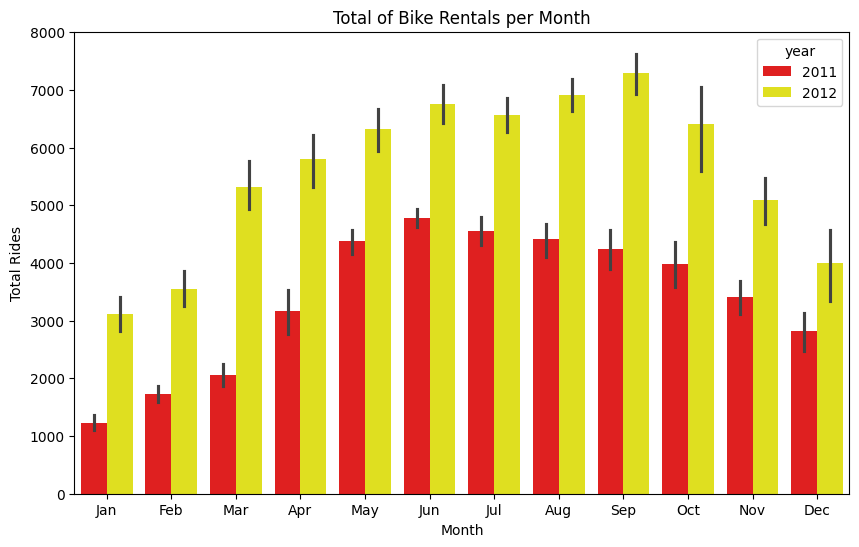

In [39]:
# Menentukan ukuran gambar untuk plot
plt.figure(figsize=(10, 6))

# Membuat barplot dengan sumbu x adalah bulan dan sumbu y adalah total sewa, menggunakan palet warna merah dan kuning
# Data dikelompokkan berdasarkan tahun menggunakan hue
sns.barplot(x='month', y='total_count', data=days_df, hue='year', palette=['red', 'yellow'])

# Memberikan label pada sumbu x
plt.xlabel("Month")

# Memberikan label pada sumbu y
plt.ylabel("Total Rides")

# Menambahkan judul pada plot
plt.title("Total of Bike Rentals per Month")

# Menampilkan plot
plt.show()


**insight**

- Bulan april hingga juni adalah periode tersibuk untuk penyewaan sepeda pada tahun 2011
- Bulan Juni hingga September pada tahun 2012  adalah periode tersibuk untuk penyewaan sepeda pada tahun 2012



### Pertanyaan 2:

2. Bagaimana musim memengaruhi tingkat penggunaan sepeda?

<ipython-input-40-f07fdd43a92c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_df = days_df.groupby("season")["total_count"].mean().reset_index()
<ipython-input-40-f07fdd43a92c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-40-f07fdd43a92c>:8: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silenc

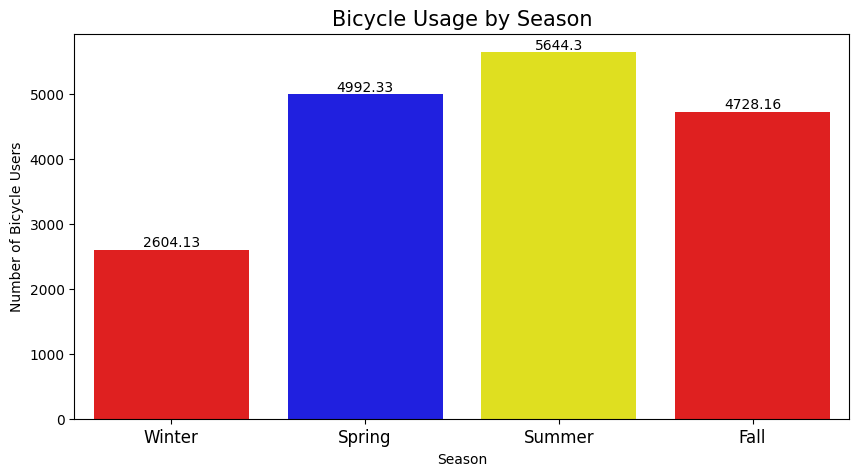

In [40]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata total_count
season_df = days_df.groupby("season")["total_count"].mean().reset_index()

# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10, 5))

# Membuat plot batang dengan warna yang ditentukan
sns.barplot(
    x="season",  # Sumbu x adalah musim
    y="total_count",  # Sumbu y adalah rata-rata jumlah pengguna sepeda
    data=season_df.sort_values(by="total_count", ascending=False),  # Mengurutkan data berdasarkan total_count
    palette=['red', 'blue', 'yellow']  # Warna batang yang ditentukan: merah, biru, dan kuning
)

# Menambahkan judul dan label sumbu
plt.title("Bicycle Usage by Season", loc="center", fontsize=15)  # Judul plot
plt.ylabel('Number of Bicycle Users')  # Label sumbu y
plt.xlabel('Season')  # Label sumbu x
plt.tick_params(axis='x', labelsize=12)  # Mengatur ukuran label sumbu x

# Menambahkan anotasi pada setiap batang dengan nilai rata-rata
for index, value in enumerate(season_df['total_count']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')  # Menampilkan nilai di atas batang

# Menampilkan plot
plt.show()


**insight**

- Musim panas adalah musim dengan penggunaan sepeda tertinggi, diikuti oleh musim gugur dan musim semi.
- Musim dingin memiliki penggunaan sepeda terendah.
- Cuaca yang lebih hangat dan lebih banyak aktivitas luar ruangan pada musim panas dan gugur berkontribusi pada peningkatan penggunaan sepeda.

### Pertanyaan 3

3. Bagaimana korelasi antara suhu terhadap total order bike riding?

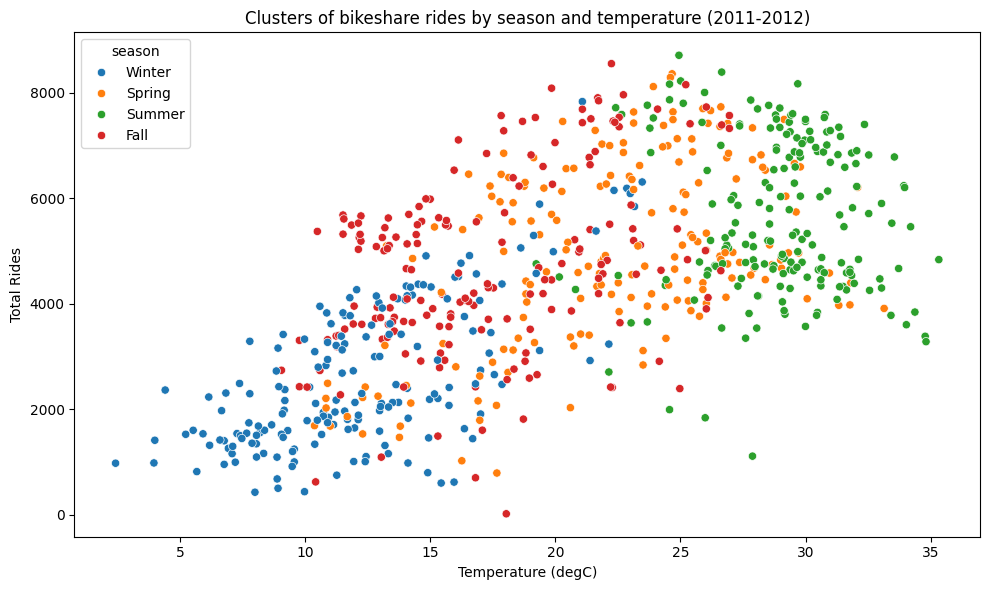

In [41]:
days_df['temp'] = days_df['temp']*41
days_df['atemp'] = days_df['atemp']*50

# Mengatur ukuran gambar untuk plot
plt.figure(figsize=(10,6))

# Membuat plot sebar dengan suhu pada sumbu x dan total perjalanan pada sumbu y, dengan warna berdasarkan musim
sns.scatterplot(x='temp', y='total_count', data=days_df, hue='season')

# Menambahkan label untuk sumbu x
plt.xlabel("Temperature (degC)") #suhu
plt.ylabel("Total Rides") #total perjalanan
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)") #judul

# tampilan plot
plt.tight_layout()
plt.show()

**Insight:**
- Ketika suhu meningkat, jumlah order sepeda cenderung juga meningkat.
- Meskipun tren umumnya positif, ada variasi antara musim. Musim panas dan musim gugur memiliki titik data yang lebih tinggi secara keseluruhan, sementara musim dingin dan musim semi cenderung memiliki titik data yang lebih rendah.
- rental bike pada periode summer dan fall dengan rentang suhu 20-30 derajat
- Beberapa titik data terlihat berada jauh dari pola umum, mungkin disebabkan oleh faktor-faktor lain seperti acara khusus atau cuaca ekstrem.


## Conclusion

- Conclution pertanyaan 1 :

Permintaan akan bikesharing mencapai puncaknya pada bulan September 2012, menunjukkan minat yang signifikan terhadap penggunaan sepeda pada periode tersebut. Sementara itu, bulan Juni 2011 juga menunjukkan permintaan tinggi, mengindikasikan bahwa bulan-bulan musim panas cenderung menarik lebih banyak pengguna bikesharing.

- Conclution pertanyaan 2 :

musim panas merupakan periode dengan penggunaan sepeda tertinggi, diikuti oleh musim gugur dan musim semi, sedangkan musim dingin mencatat penggunaan sepeda terendah. Peningkatan penggunaan sepeda pada musim panas dan gugur dipengaruhi oleh cuaca yang lebih hangat serta meningkatnya aktivitas luar ruangan.

- Conclution pertanyaan 3 :

Jumlah pemesanan sepeda meningkat seiring dengan suhu yang lebih tinggi, terutama pada musim panas dan gugur, yang menunjukkan tingkat pemesanan lebih tinggi dibandingkan musim dingin dan semi. Penggunaan sepeda pada musim panas dan gugur umumnya terjadi pada suhu 20-30 derajat.